<a href="https://colab.research.google.com/github/M3thsara/M3thsara-Image-Processing-and-Machine-Vision/blob/A01-Intensity-Transformations-and-Neighborhood-Filtering/A01_Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Intensity Transformation**

In [55]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

!git clone https://github.com/M3thsara/M3thsara-Image-Processing-and-Machine-Vision.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cloning into 'M3thsara-Image-Processing-and-Machine-Vision'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 1.55 MiB | 12.48 MiB/s, done.
Resolving deltas: 100% (7/7), done.


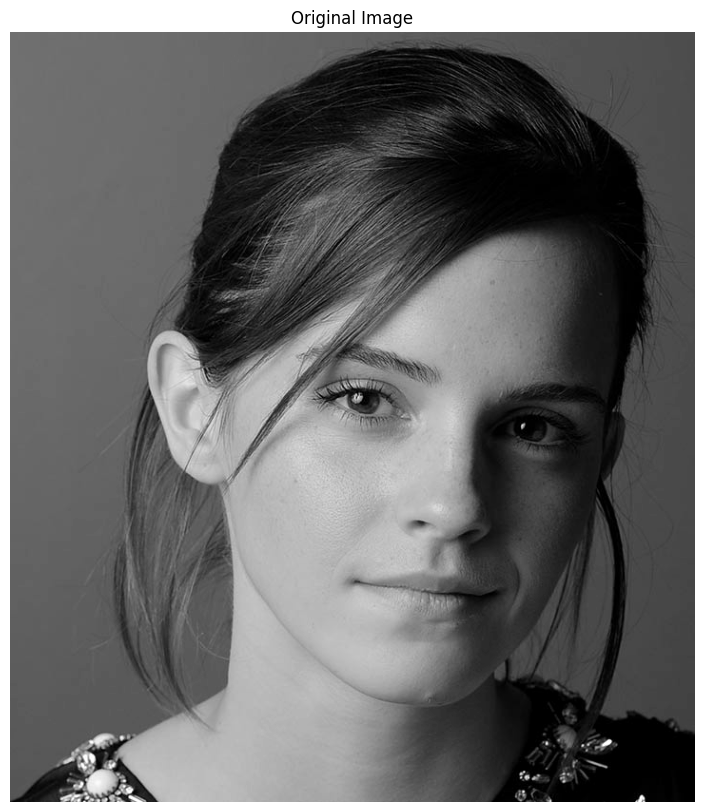

In [42]:
import cv2 as cv     #open opencv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
assert image is not None

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

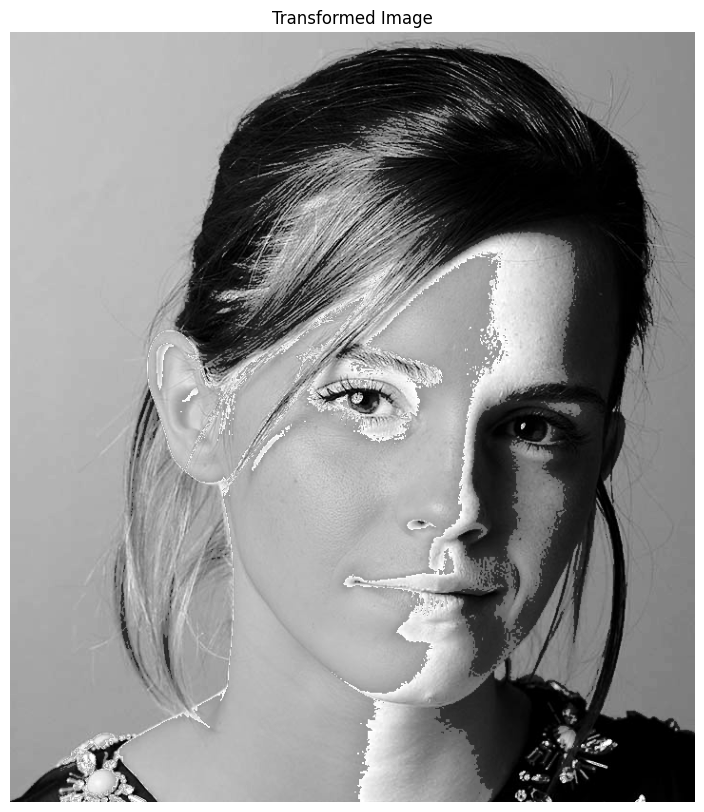

In [43]:
# Define the intensity transformation function based on line equations

def intensity_transformation(pixel_value):

    if 0 <= pixel_value <= 50:
        return pixel_value                                                      # y = x for 0 <= x <= 50

    elif 50 < pixel_value <= 150:
        return 1.55 * pixel_value + 22.5                                        # y = 1.55x + 22.5  for 50 < x <= 150

    elif 150 < pixel_value <= 255:
        return pixel_value                                                      # y = x for  150 < x <= 255

# Create an empty array (same size as the image) to store the transformed pixel values.

transformed_image = np.zeros(image.shape, dtype=np.uint8)

# Loop through every pixel in the image and apply the transformation

for i in range(image.shape[0]):                                                 # Loop over the image rows
    for j in range(image.shape[1]):                                             # Loop over the image columns
        transformed_image[i, j] = intensity_transformation(image[i, j])

# Show the transformed image

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')
plt.show()


# **2. Accentuate matter**

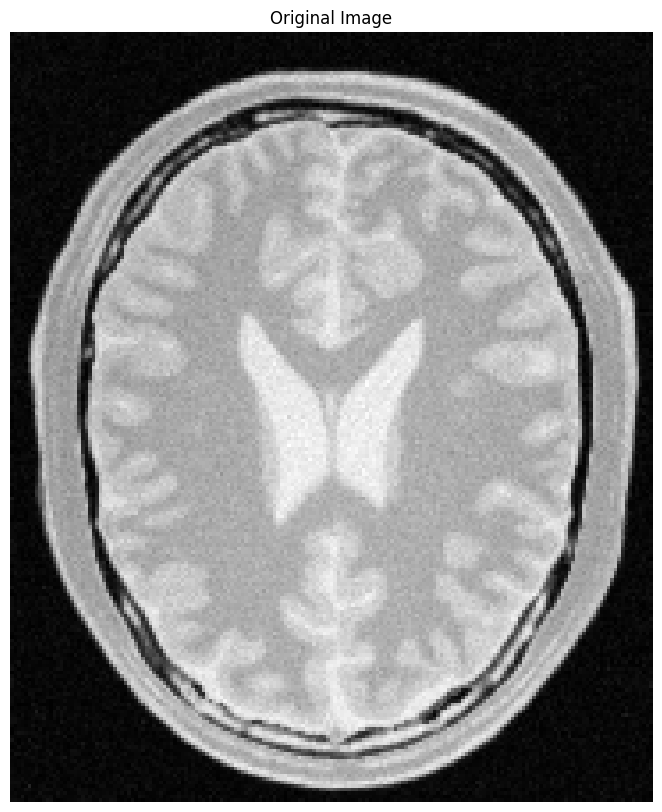

In [45]:
image2 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/a1images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert image2 is not None

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()

Gray Matter Intensity: (65, 108): 199
White Matter Intensity: (125, 120): 155


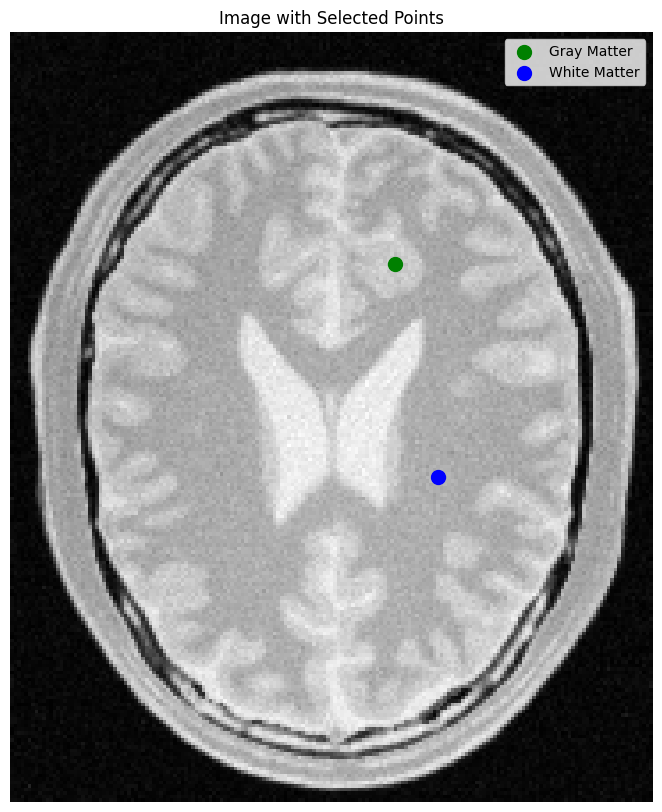

In [46]:
# Measure the intensity at the specified locations

#coordinates (row, column)
location1 = (65, 108)
location2 = (125, 120)

# Intensity at locations
intensity1 = image2[location1]
intensity2 = image2[location2]

# Print the results
print(f'Gray Matter Intensity: {location1}: {intensity1}')
print(f'White Matter Intensity: {location2}: {intensity2}')

plt.figure(figsize=(10, 10))
plt.title('Image with Selected Points')
plt.imshow(image2, cmap='gray')

plt.scatter(location1[1], location1[0], color='green', marker='o', s=100, label='Gray Matter')
plt.scatter(location2[1], location2[0], color='blue', marker='o', s=100, label='White Matter')
plt.axis('off')
plt.legend()

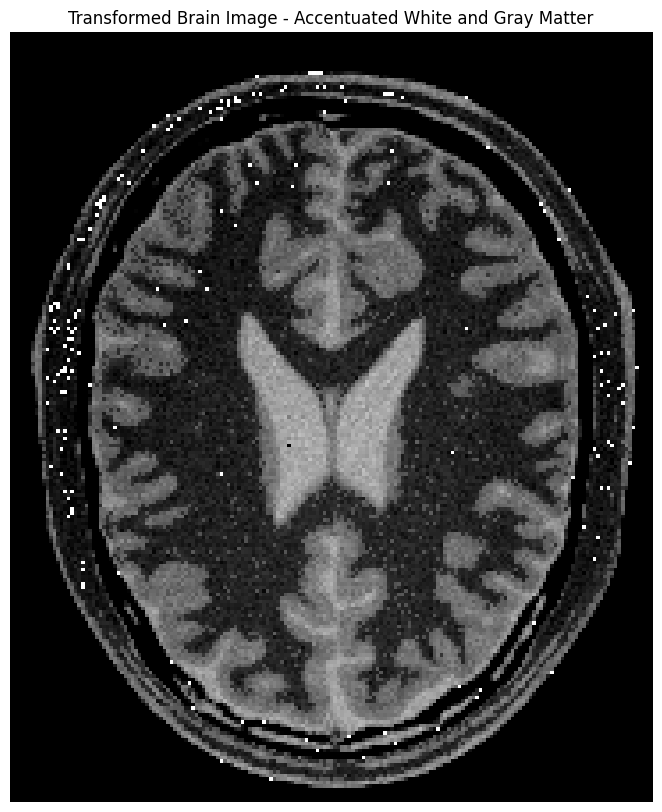

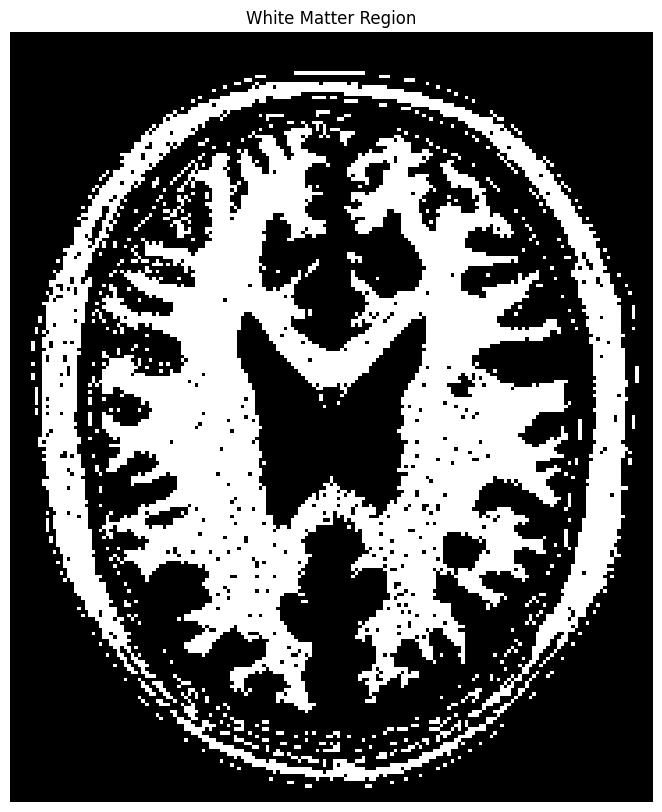

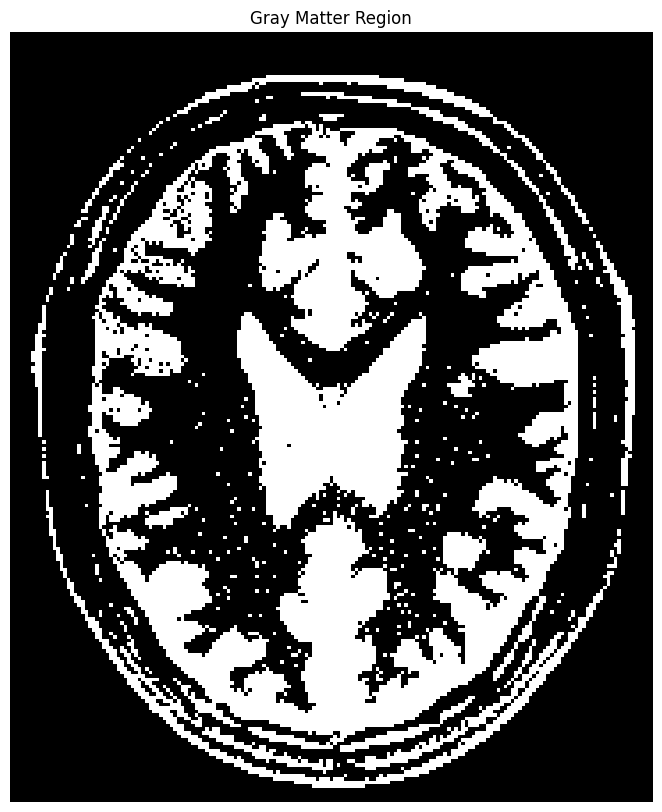

In [53]:
# Function to transform pixel intensities for white and gray matter in brain images

def accentuate_matter(image_):

    # Create an empty array to store the transformed pixel values.
    transformed_image = np.zeros(image_.shape, dtype=np.uint8)

    # Transform gray matter intensities (181 to 250)
    gray_matter_region = (image_ >= 181) & (image_ <= 250)
    transformed_image[gray_matter_region] = 1.7 * image_[gray_matter_region] + 28

    # Transform white matter intensities (145 to 180)
    white_matter_region = (image_ >= 145) & (image_ <= 180)
    transformed_image[white_matter_region] = 1.6 * image_[white_matter_region] + 20

    return transformed_image, white_matter_region, gray_matter_region

# Apply the transform function to the image

transformed_brain_image, white_matter_region, gray_matter_region = accentuate_matter(image2)

# Display the transformed brain image

plt.figure(figsize=(10, 10))
plt.imshow(transformed_brain_image, cmap='gray')
plt.title("Transformed Brain Image - Accentuated White and Gray Matter")
plt.axis('off')
plt.show()

# Display the white matter region

plt.figure(figsize=(10, 10))
plt.imshow(white_matter_region, cmap='gray')
plt.title("White Matter Region")
plt.axis('off')
plt.show()

# Display the gray matter region

plt.figure(figsize=(10, 10))
plt.imshow(gray_matter_region, cmap='gray')
plt.title("Gray Matter Region")
plt.axis('off')
plt.show()

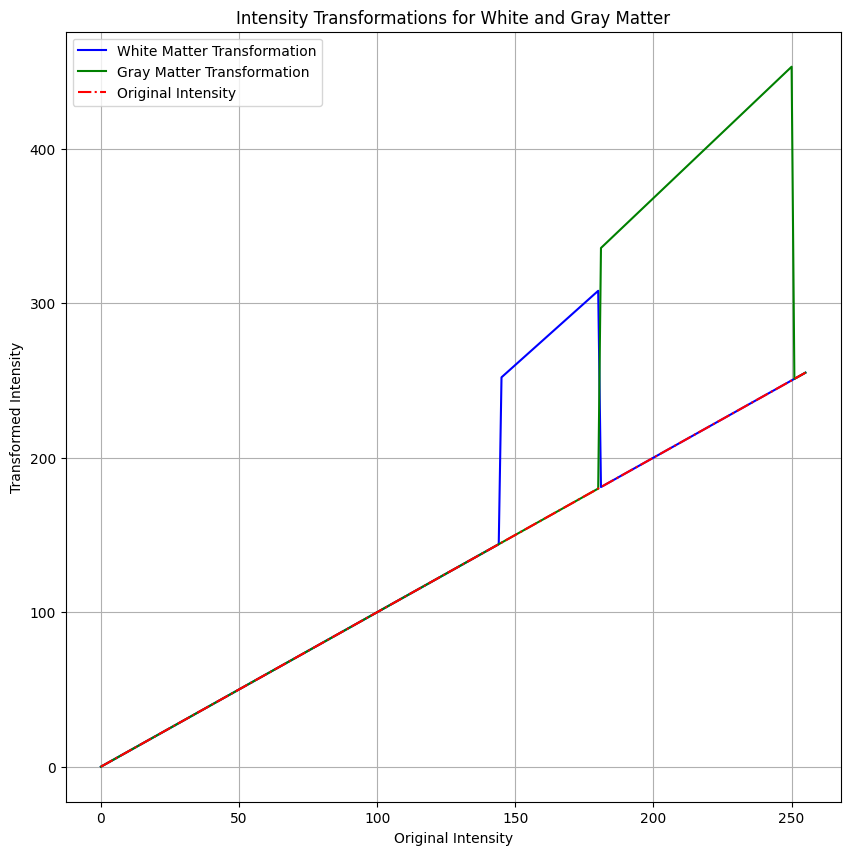

In [61]:
# Create an array of values from 0 to 255
intensity_values = np.arange(0, 256)  # Intensity range (0 to 255)

# Create arrays to hold transformed intensities
gray_matter_transformed = np.zeros(intensity_values.shape)
white_matter_transformed = np.zeros(intensity_values.shape)

for i in range(len(intensity_values)):
    if 181 <= intensity_values[i] <= 250:
        gray_matter_transformed[i] = 1.7 * intensity_values[i] + 28
    else:
        gray_matter_transformed[i] = intensity_values[i]

#Define the transformation for white matter intensities

for i in range(len(intensity_values)):
    if 145 <= intensity_values[i] <= 180:
        white_matter_transformed[i] = 1.6 * intensity_values[i] + 20
    else:
        white_matter_transformed[i] = intensity_values[i]

#Plot the intensity transformations
plt.figure(figsize=(10, 10))

plt.plot(intensity_values, white_matter_transformed, label='White Matter Transformation', color='blue')
plt.plot(intensity_values, gray_matter_transformed, label='Gray Matter Transformation', color='green')

# Plot the original intensity
plt.plot(intensity_values, intensity_values, label='Original Intensity', linestyle='-.', color='red')

plt.title('Intensity Transformations for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()

# **3. Gamma Correction**

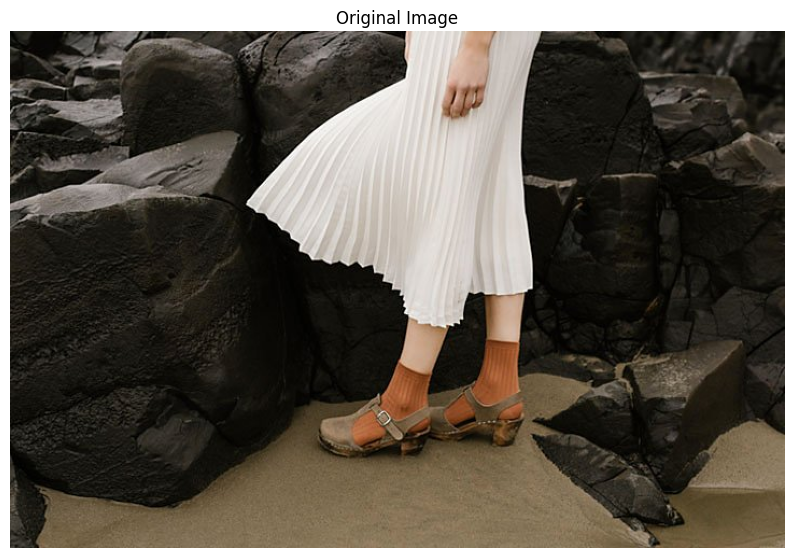

In [64]:
image3 = cv.imread('/content/drive/MyDrive/Images - EN3160 IPMV/a1images/highlights_and_shadows.jpg')
assert image2 is not None, "Failed to load the image."

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

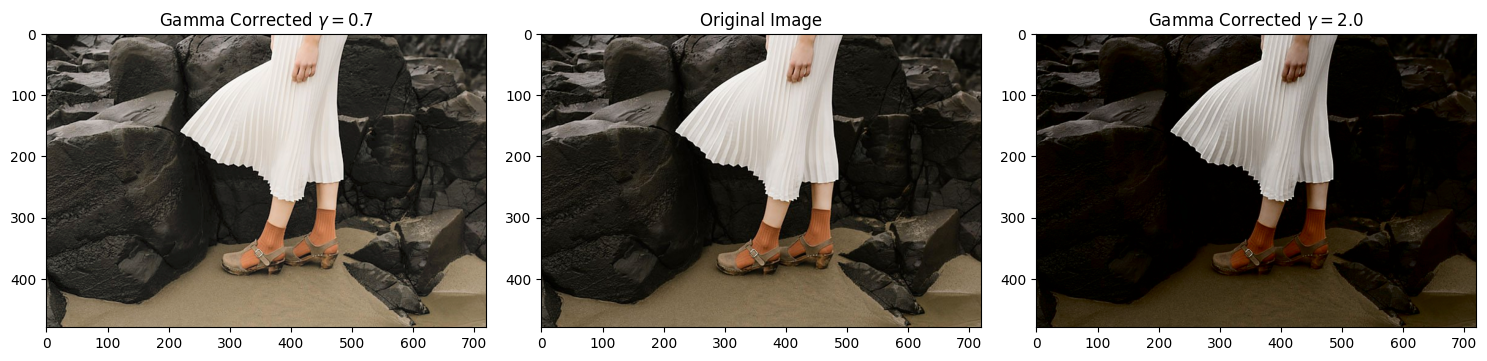

In [76]:
# Change the image from BGR format to LAB color format
lab_image = cv.cvtColor(image3, cv.COLOR_BGR2LAB)

# Separate the LAB image into its three channels (L, A and B)
L_channel, A_channel, B_channel = cv.split(lab_image)

# Normalize the L channel to [0, 1]
L = L_channel / 255.0

# Function to apply gamma correction

def apply_gamma_correction(L_channel, A_channel, B_channel, gamma_value):

    # Apply gamma correction to the L (lightness) channel
    L_corrected = np.power(L_channel, gamma_value)

    # Rescale the corrected L channel to [0, 255] and convert to uint8
    L_corrected_uint8 = np.uint8(L_corrected * 255)

    # Ensure all channels have the same size and type
    A_channel = A_channel.astype(np.uint8)
    B_channel = B_channel.astype(np.uint8)

    # Combine corrected L channel with original A and B channels
    lab_image_corrected = cv.merge((L_corrected_uint8, A_channel, B_channel))

    # Convert the LAB image back to BGR color space
    output_image = cv.cvtColor(lab_image_corrected, cv.COLOR_LAB2BGR)

    return output_image

# Gamma correction for high gamma value (2.0)
gamma_high_value = 2.0
output_high_gamma_image = apply_gamma_correction(L, A_channel, B_channel, gamma_high_value)

# Gamma correction for low gamma value (0.7)
gamma_low_value = 0.7
output_low_gamma_image = apply_gamma_correction(L, A_channel, B_channel, gamma_low_value)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the low gamma corrected image
axs[0].set_title("Gamma Corrected $\gamma = 0.7$")
axs[0].imshow(cv.cvtColor(output_low_gamma_image, cv.COLOR_BGR2RGB))

# Plot the original image
axs[1].set_title("Original Image")
axs[1].imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))

# Plot the high gamma corrected image
axs[2].set_title("Gamma Corrected $\gamma = 2.0$")
axs[2].imshow(cv.cvtColor(output_high_gamma_image, cv.COLOR_BGR2RGB))

# Show the figure
plt.tight_layout()
plt.show()

In [79]:
image3[:, :, 0].shape

(480, 720)

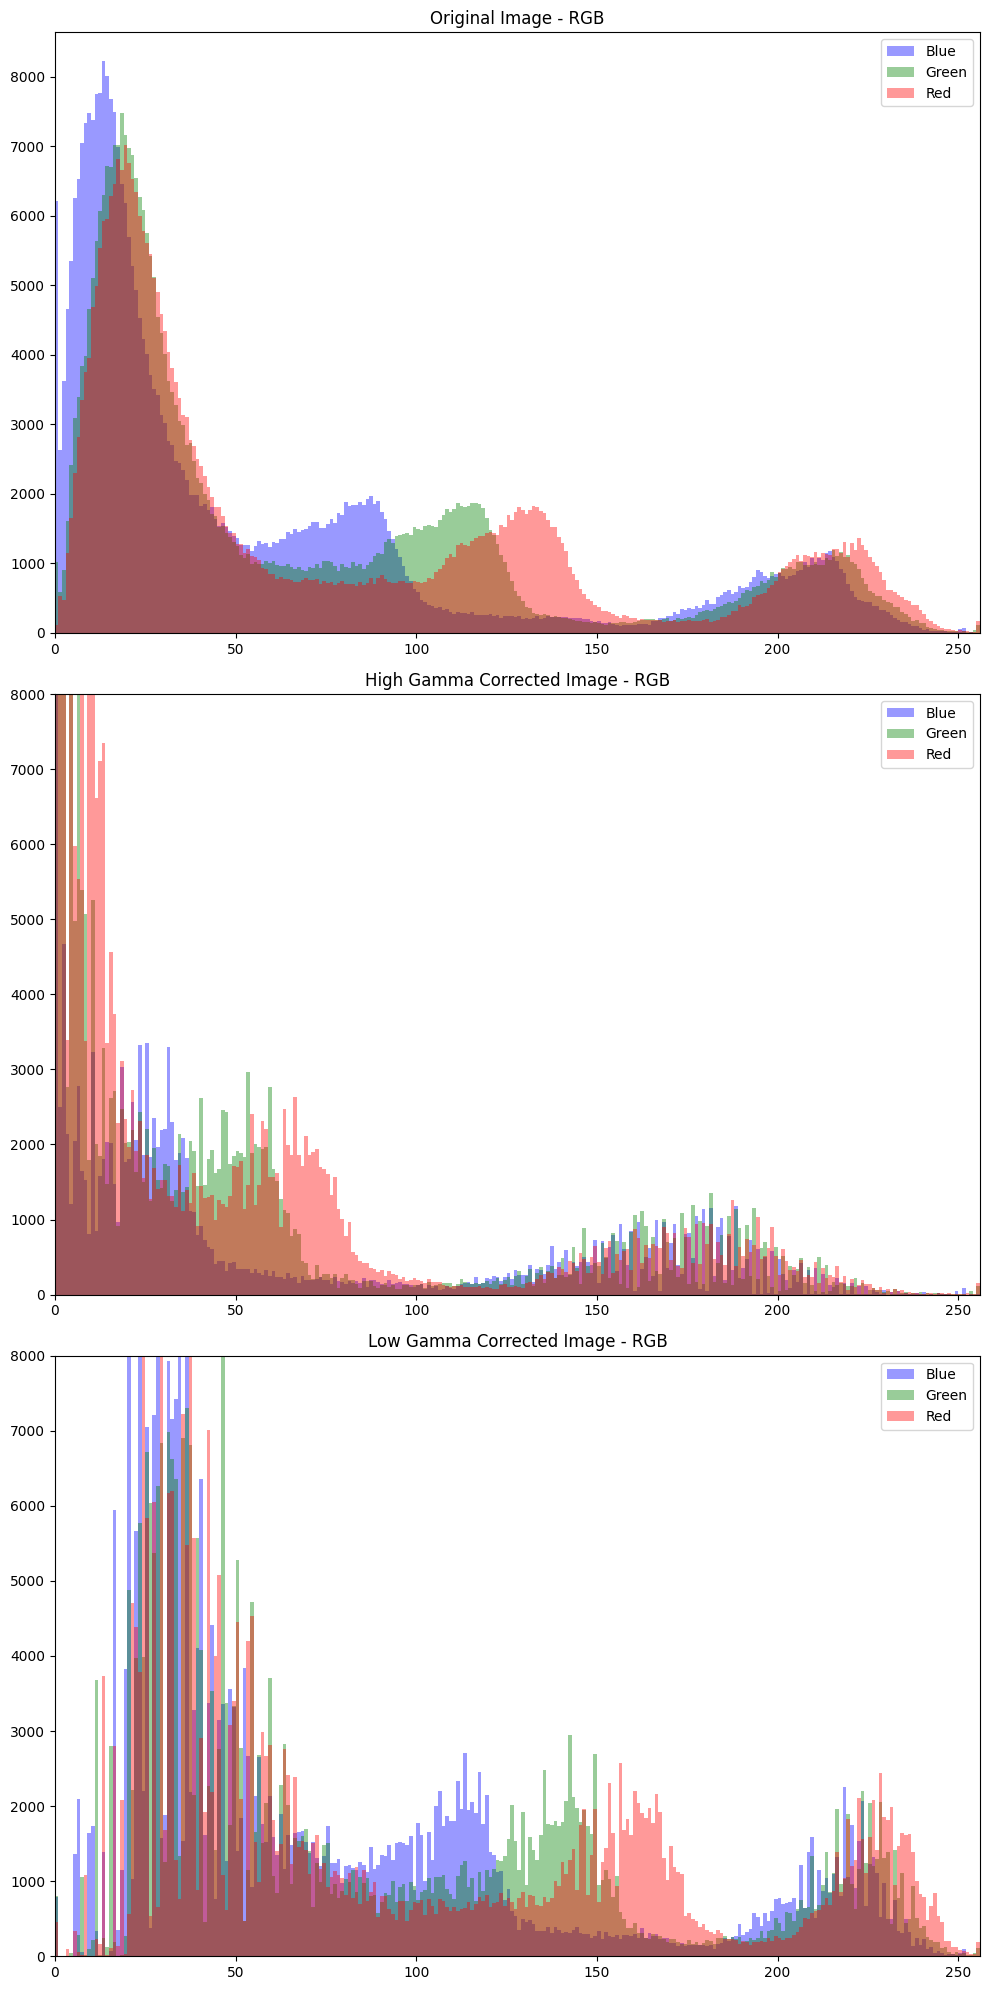

In [85]:
# Create subplots for histograms of the original and gamma-corrected images
fig, ax = plt.subplots(3, 1, figsize=(10, 20))

# Plot histogram for the original image

ax[0].set_title("Original Image - RGB")

for i, color in enumerate(['b', 'g', 'r']):                                                                       # Loop through blue, green, red channels
    ax[0].hist(image3[:, :, i].ravel(), bins=256, range=[0, 256], color=color, alpha=0.4)

ax[0].set_xlim([0, 256])
ax[0].legend(['Blue', 'Green', 'Red'])

# Plot histogram for the low gamma-corrected image

ax[1].set_title("High Gamma Corrected Image - RGB")

for i, color in enumerate(['b', 'g', 'r']):                                                                      # Loop through blue, green, red channels
    ax[1].hist(output_high_gamma_image[:, :, i].ravel(), bins=256, range=[0, 256], color=color, alpha=0.4)

ax[1].set_xlim([0, 256])
ax[1].set_ylim([0, 8000])                                                                                        # Set y-axis limit to reduce zeros' influence
ax[1].legend(['Blue', 'Green', 'Red'])

# Plot histogram for the high gamma-corrected image

ax[2].set_title("Low Gamma Corrected Image - RGB")

for i, color in enumerate(['b', 'g', 'r']):                                                                      # Loop through blue, green, red channels
    ax[2].hist(output_low_gamma_image[:, :, i].ravel(), bins=256, range=[0, 256], color=color, alpha=0.4)

ax[2].set_xlim([0, 256])
ax[2].set_ylim([0, 8000])
ax[2].legend(['Blue', 'Green', 'Red'])

plt.tight_layout()
plt.show()